In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Get the metrics from each of the checkpoint files in the directory
def get_metrics_from_checkpoints(directory, verbose=True):
    train_metrics = {}
    val_metrics = {}

    # Sort the checkpoint directories numerically
    checkpoint_dirs = sorted(
        [d for d in os.listdir(directory) if d.startswith("checkpoint-")],
        key=lambda x: int(x.split('-')[1])
    )
    for filename in checkpoint_dirs:
        if verbose:
            print(f"Processing {filename}")
        file = json.load(open(os.path.join(directory, f"{filename}/trainer_state.json")))
        temp_train_metrics = file['log_history'][-2]
        temp_val_metrics = file['log_history'][-1]

        for key, value in temp_val_metrics.items():
            if key not in val_metrics:
                val_metrics[key] = []
            val_metrics[key].append(value)

        for key, value in temp_train_metrics.items():
            if key not in train_metrics:
                train_metrics[key] = []
            train_metrics[key].append(value)

    return train_metrics, val_metrics


In [ ]:
import pandas as pd
import os
import json


def extract_and_save_metrics(checkpoint_path, output_csv):

    original_path = f"{checkpoint_path}/trainer_state.json"

    with open(original_path) as file:
        info = json.load(file)
        info = info["log_history"]
        df = pd.DataFrame(info)
        df = df.groupby('epoch').first().reset_index()
        df.to_csv(output_csv, index=False)

def get_plots(checkpoint_path, save_plots=False, experiment_name=None):
    
    train_data, val_data = get_metrics_from_checkpoints(checkpoint_path) # Folder containing the checkpoints
    
    TITLE = checkpoint_path.split('/')[-1]
    TITLE = TITLE.replace("_results_", " ")
    TITLE = TITLE.replace("_", " ")
    TITLE = TITLE.rsplit(' ', 1)[0]
    if experiment_name:
        TITLE = experiment_name + " " + TITLE
    train_loss = train_data['loss']
    val_loss = val_data['eval_loss']

    print(TITLE)

    learningrate = train_data['learning_rate']
    acc1 = val_data['eval_accuracy_branch1']
    acc2 = val_data['eval_accuracy_branch2']
    prec1 = val_data['eval_precision_branch1']
    prec2 = val_data['eval_precision_branch2']
    recall1 = val_data['eval_recall_branch1']
    recall2 = val_data['eval_recall_branch2']
    f1_1 = val_data['eval_f1_branch1']
    f1_2 = val_data['eval_f1_branch2']

    # Put all the plots together using subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    axs[0, 0].plot(train_loss, label='Training Loss', color='blue')
    axs[0, 0].plot(val_loss, label='Validation Loss', color='orange')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].set_title(f'Training and Validation Loss Over Epochs - {TITLE}')
    axs[0, 0].legend()

    axs[0, 1].plot(learningrate, label='Learning Rate', color='green')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Learning Rate')
    axs[0, 1].set_title(f'Learning Rate Over Epochs - {TITLE}')
    axs[0, 1].legend()

    axs[1, 0].plot(acc1, label='Branch 1 Accuracy', color='red')
    axs[1, 0].plot(acc2, label='Branch 2 Accuracy', color='purple')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Accuracy')    
    axs[1, 0].set_title(f'Validation Accuracy Over Epochs - {TITLE}')
    axs[1, 0].legend()

    axs[1, 1].plot(prec1, label='Branch 1 Precision', color='cyan')
    axs[1, 1].plot(prec2, label='Branch 2 Precision', color='magenta')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Precision')
    axs[1, 1].set_title(f'Validation Precision Over Epochs - {TITLE}')
    axs[1, 1].legend()

    axs[2, 0].plot(recall1, label='Branch 1 Recall', color='brown')
    axs[2, 0].plot(recall2, label=' Branch 2 Recall', color='pink')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Recall')
    axs[2, 0].set_title(f'Validation Recall Over Epochs - {TITLE}')
    axs[2, 0].legend()  

    axs[2, 1].plot(f1_1, label='Branch 1 F1 Score', color='olive')
    axs[2, 1].plot(f1_2, label='Branch 2 F1 Score', color='teal')
    axs[2, 1].set_xlabel('Epochs')
    axs[2, 1].set_ylabel('F1 Score')
    axs[2, 1].set_title(f'Validation F1 Score Over Epochs - {TITLE}')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()
    if save_plots:
        if not os.path.exists('./plots/'):
            os.makedirs('./plots/')
        plt.savefig(f'./plots/{TITLE}_all_metrics_plot.png')
    

    


Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

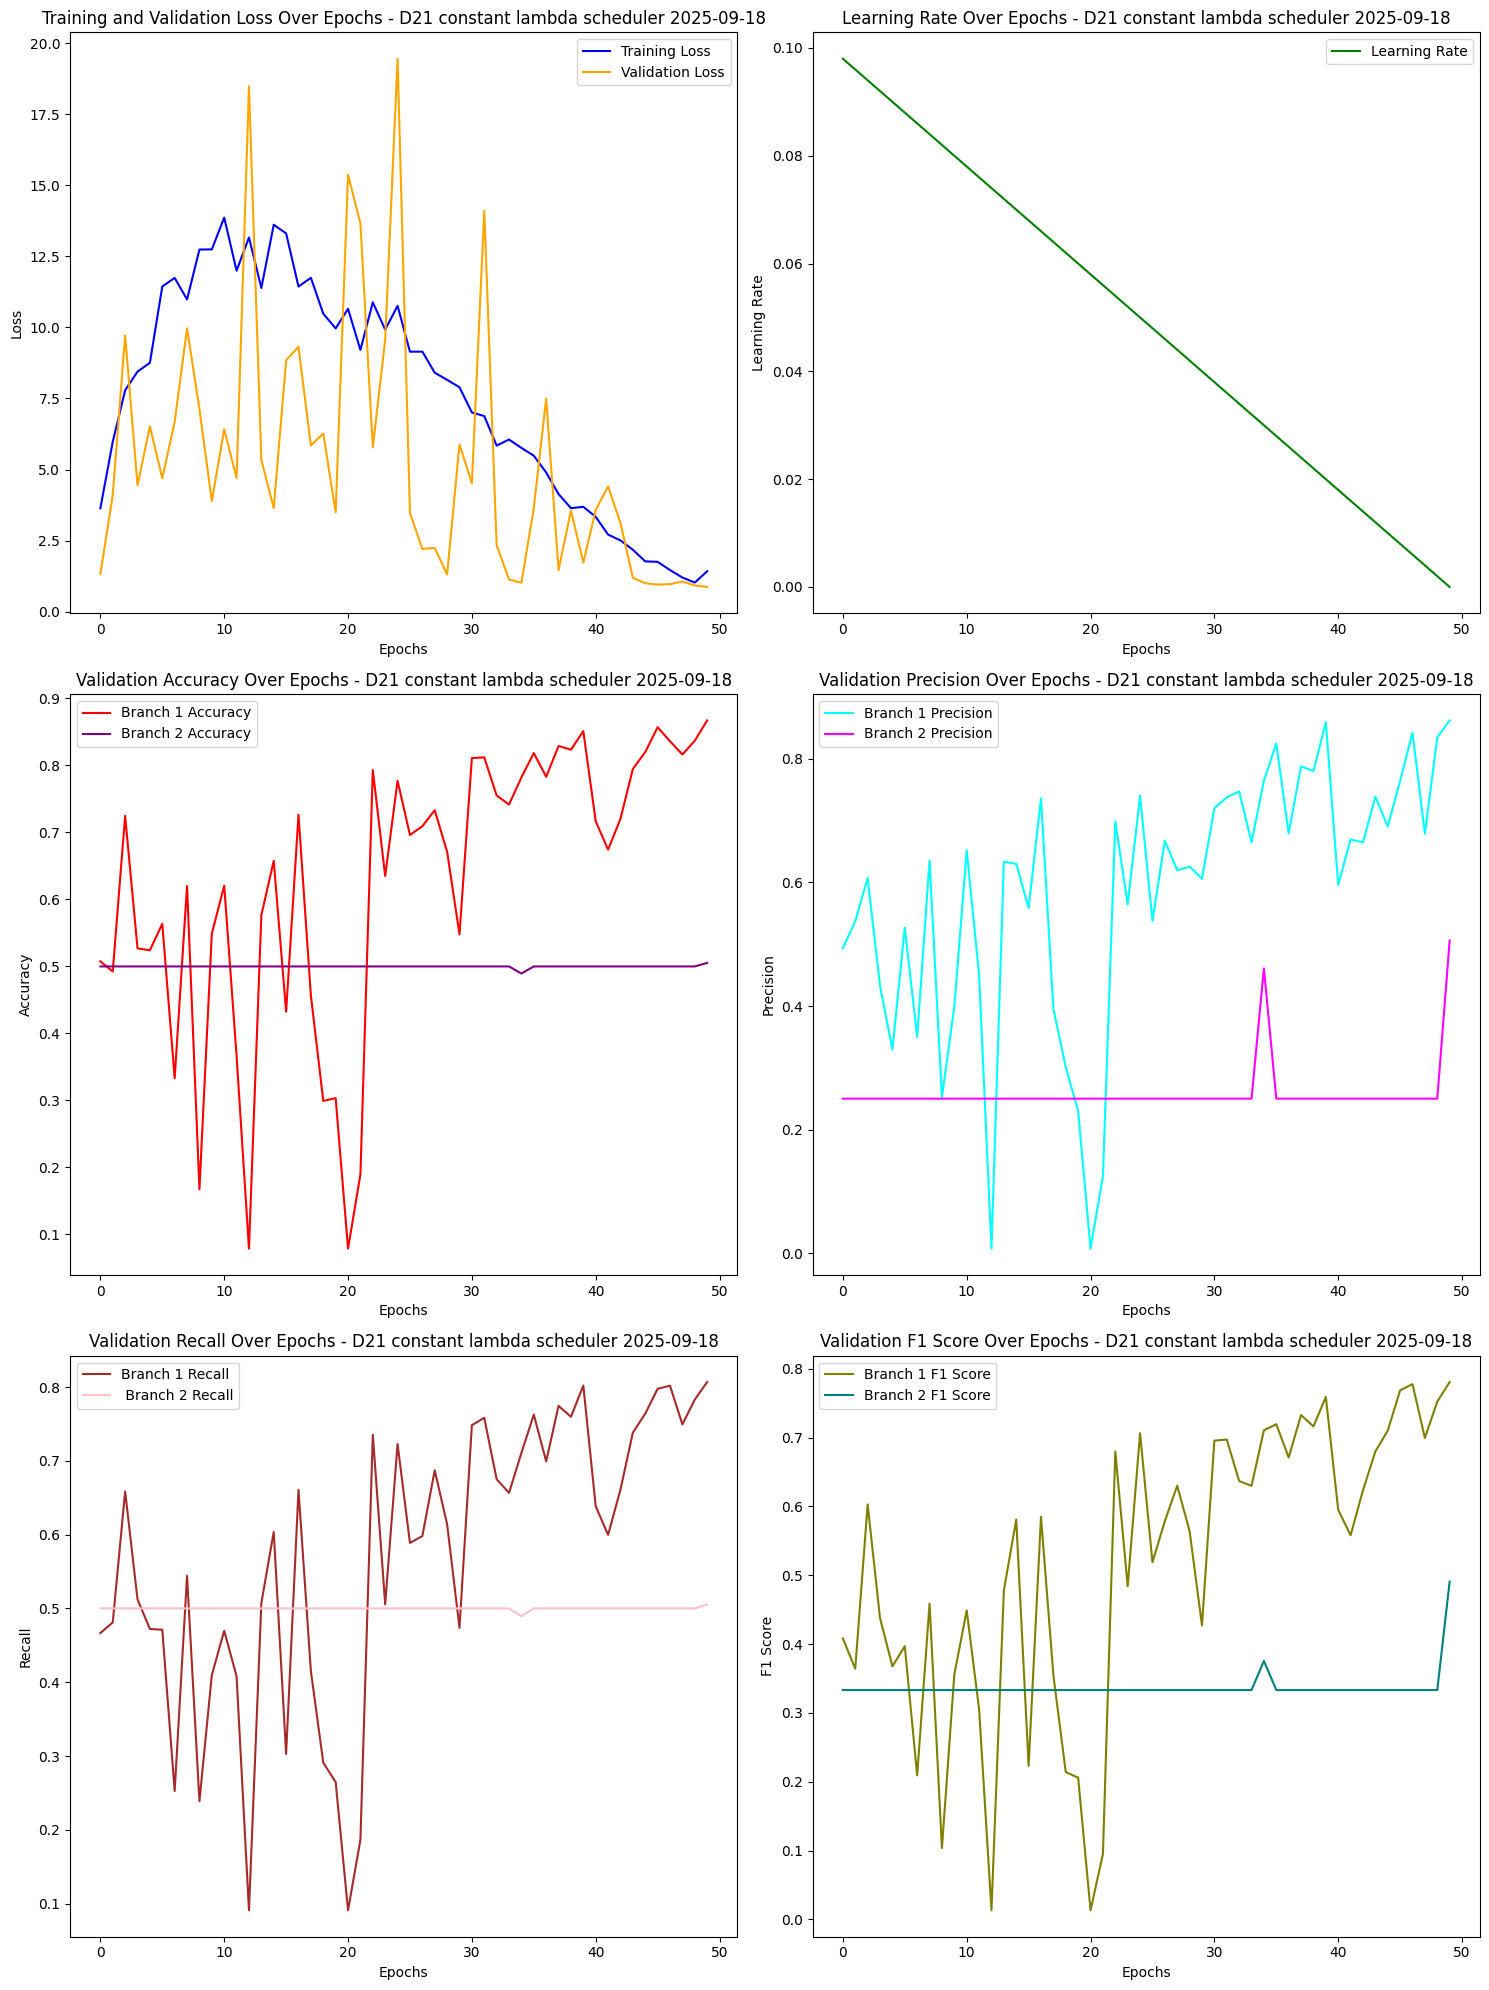

In [ ]:
# Constant Lambda
extract_and_save_metrics("./data/D21_results/constant_lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_constant_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/constant_lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

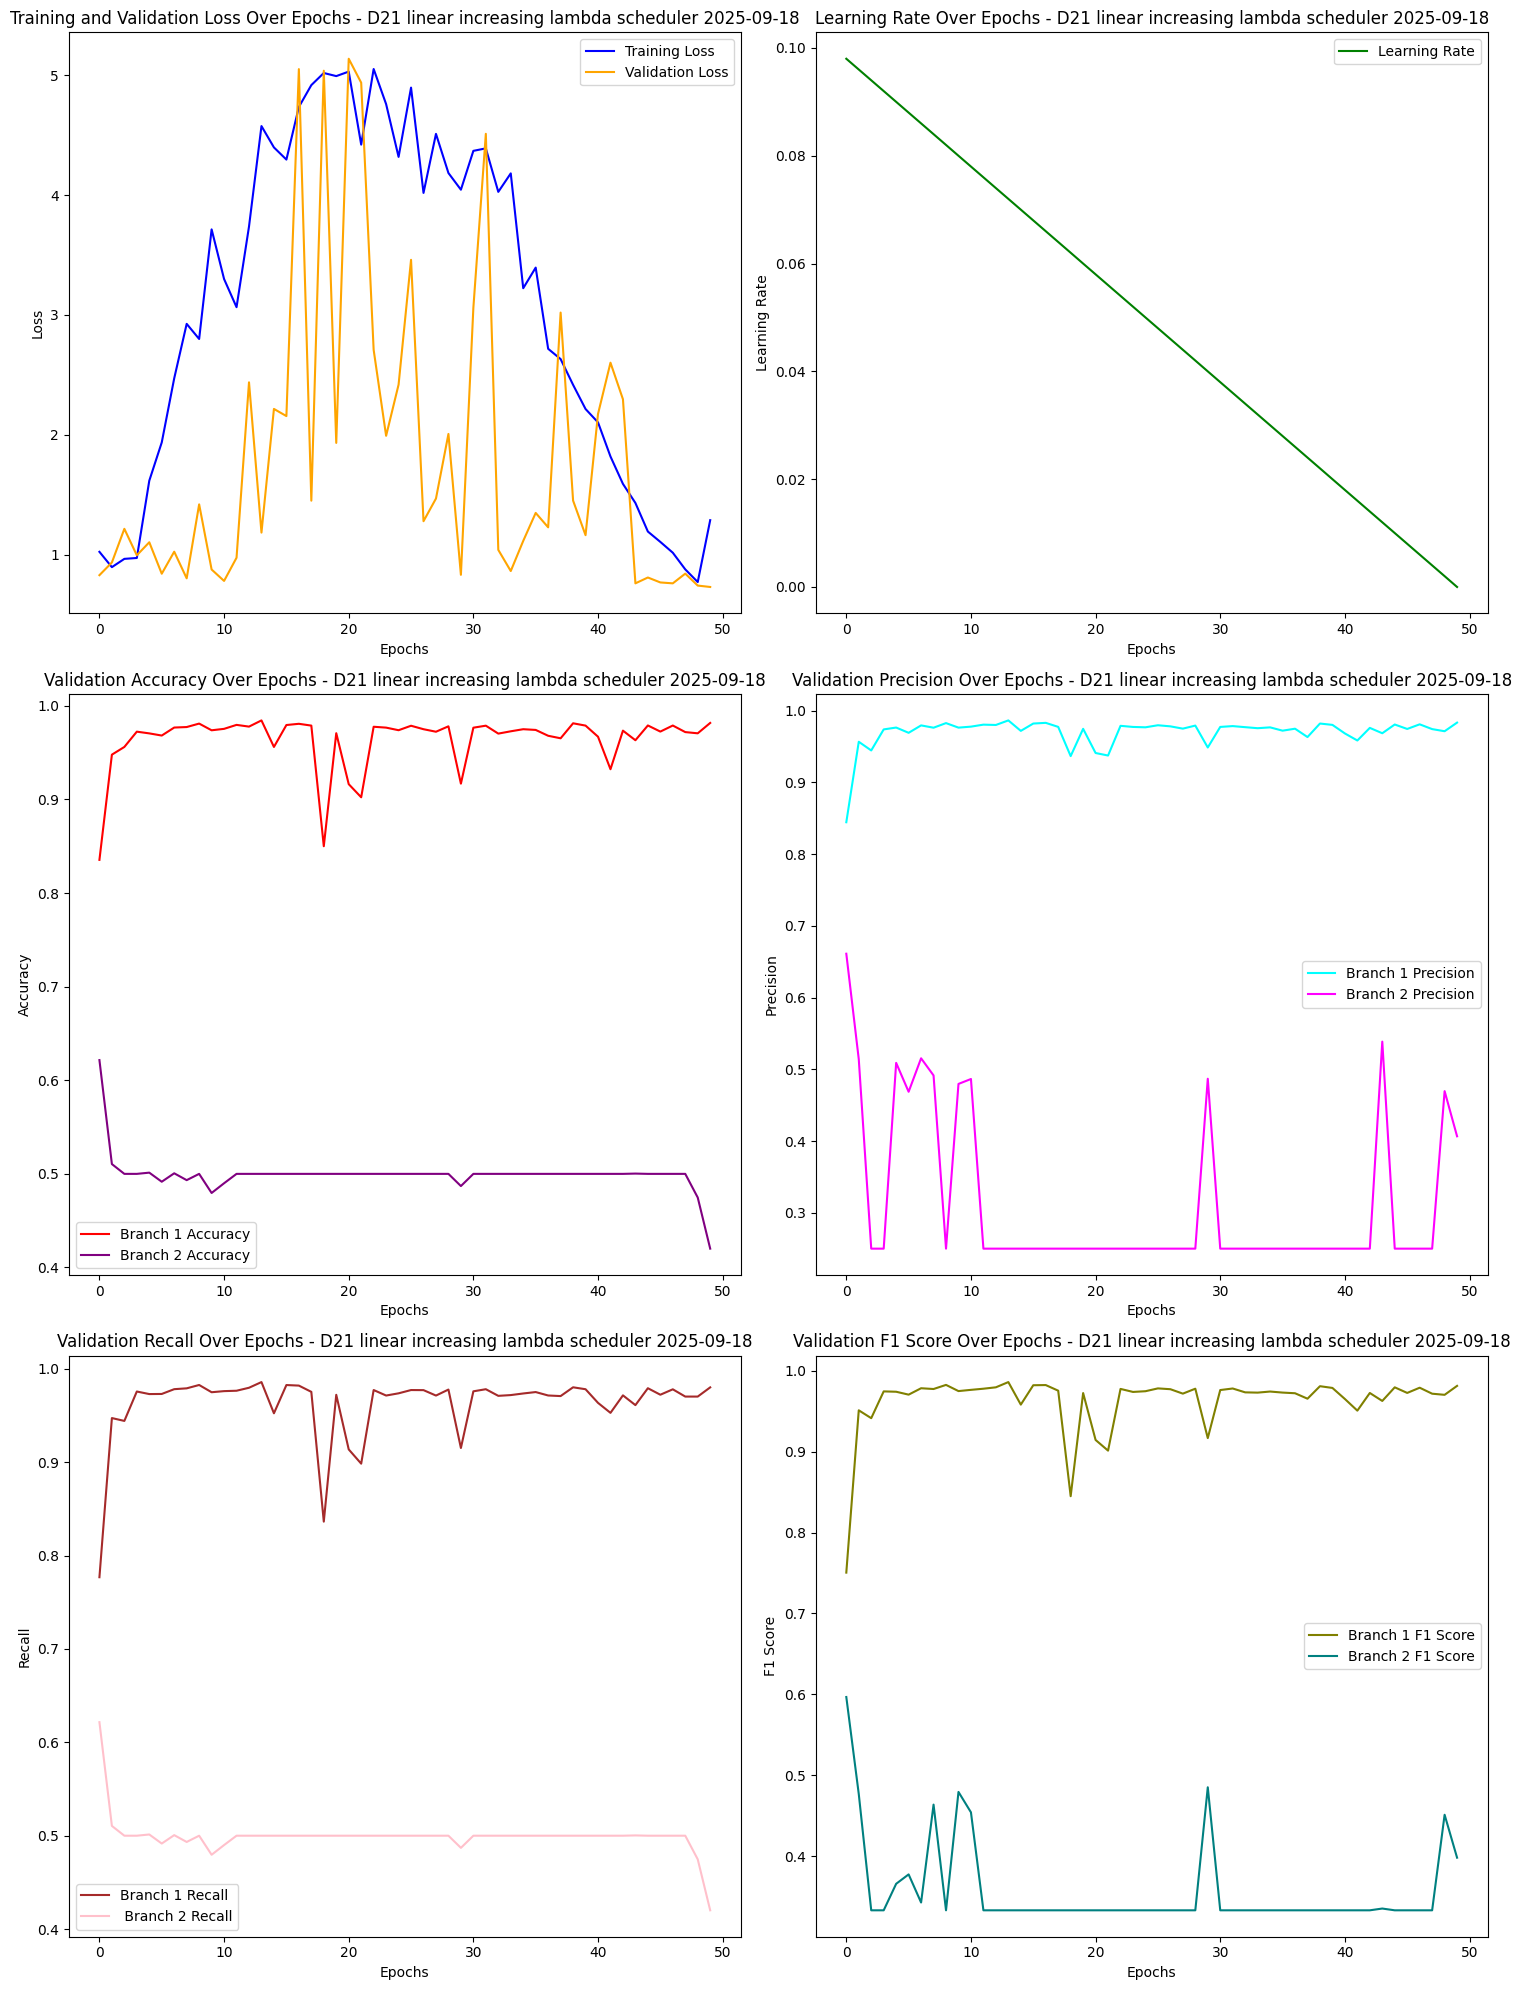

<Figure size 640x480 with 0 Axes>

In [14]:
# Linear increasing
extract_and_save_metrics("./data/D21_results/linear_increasing_lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_linear_increasing_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/linear_increasing_lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

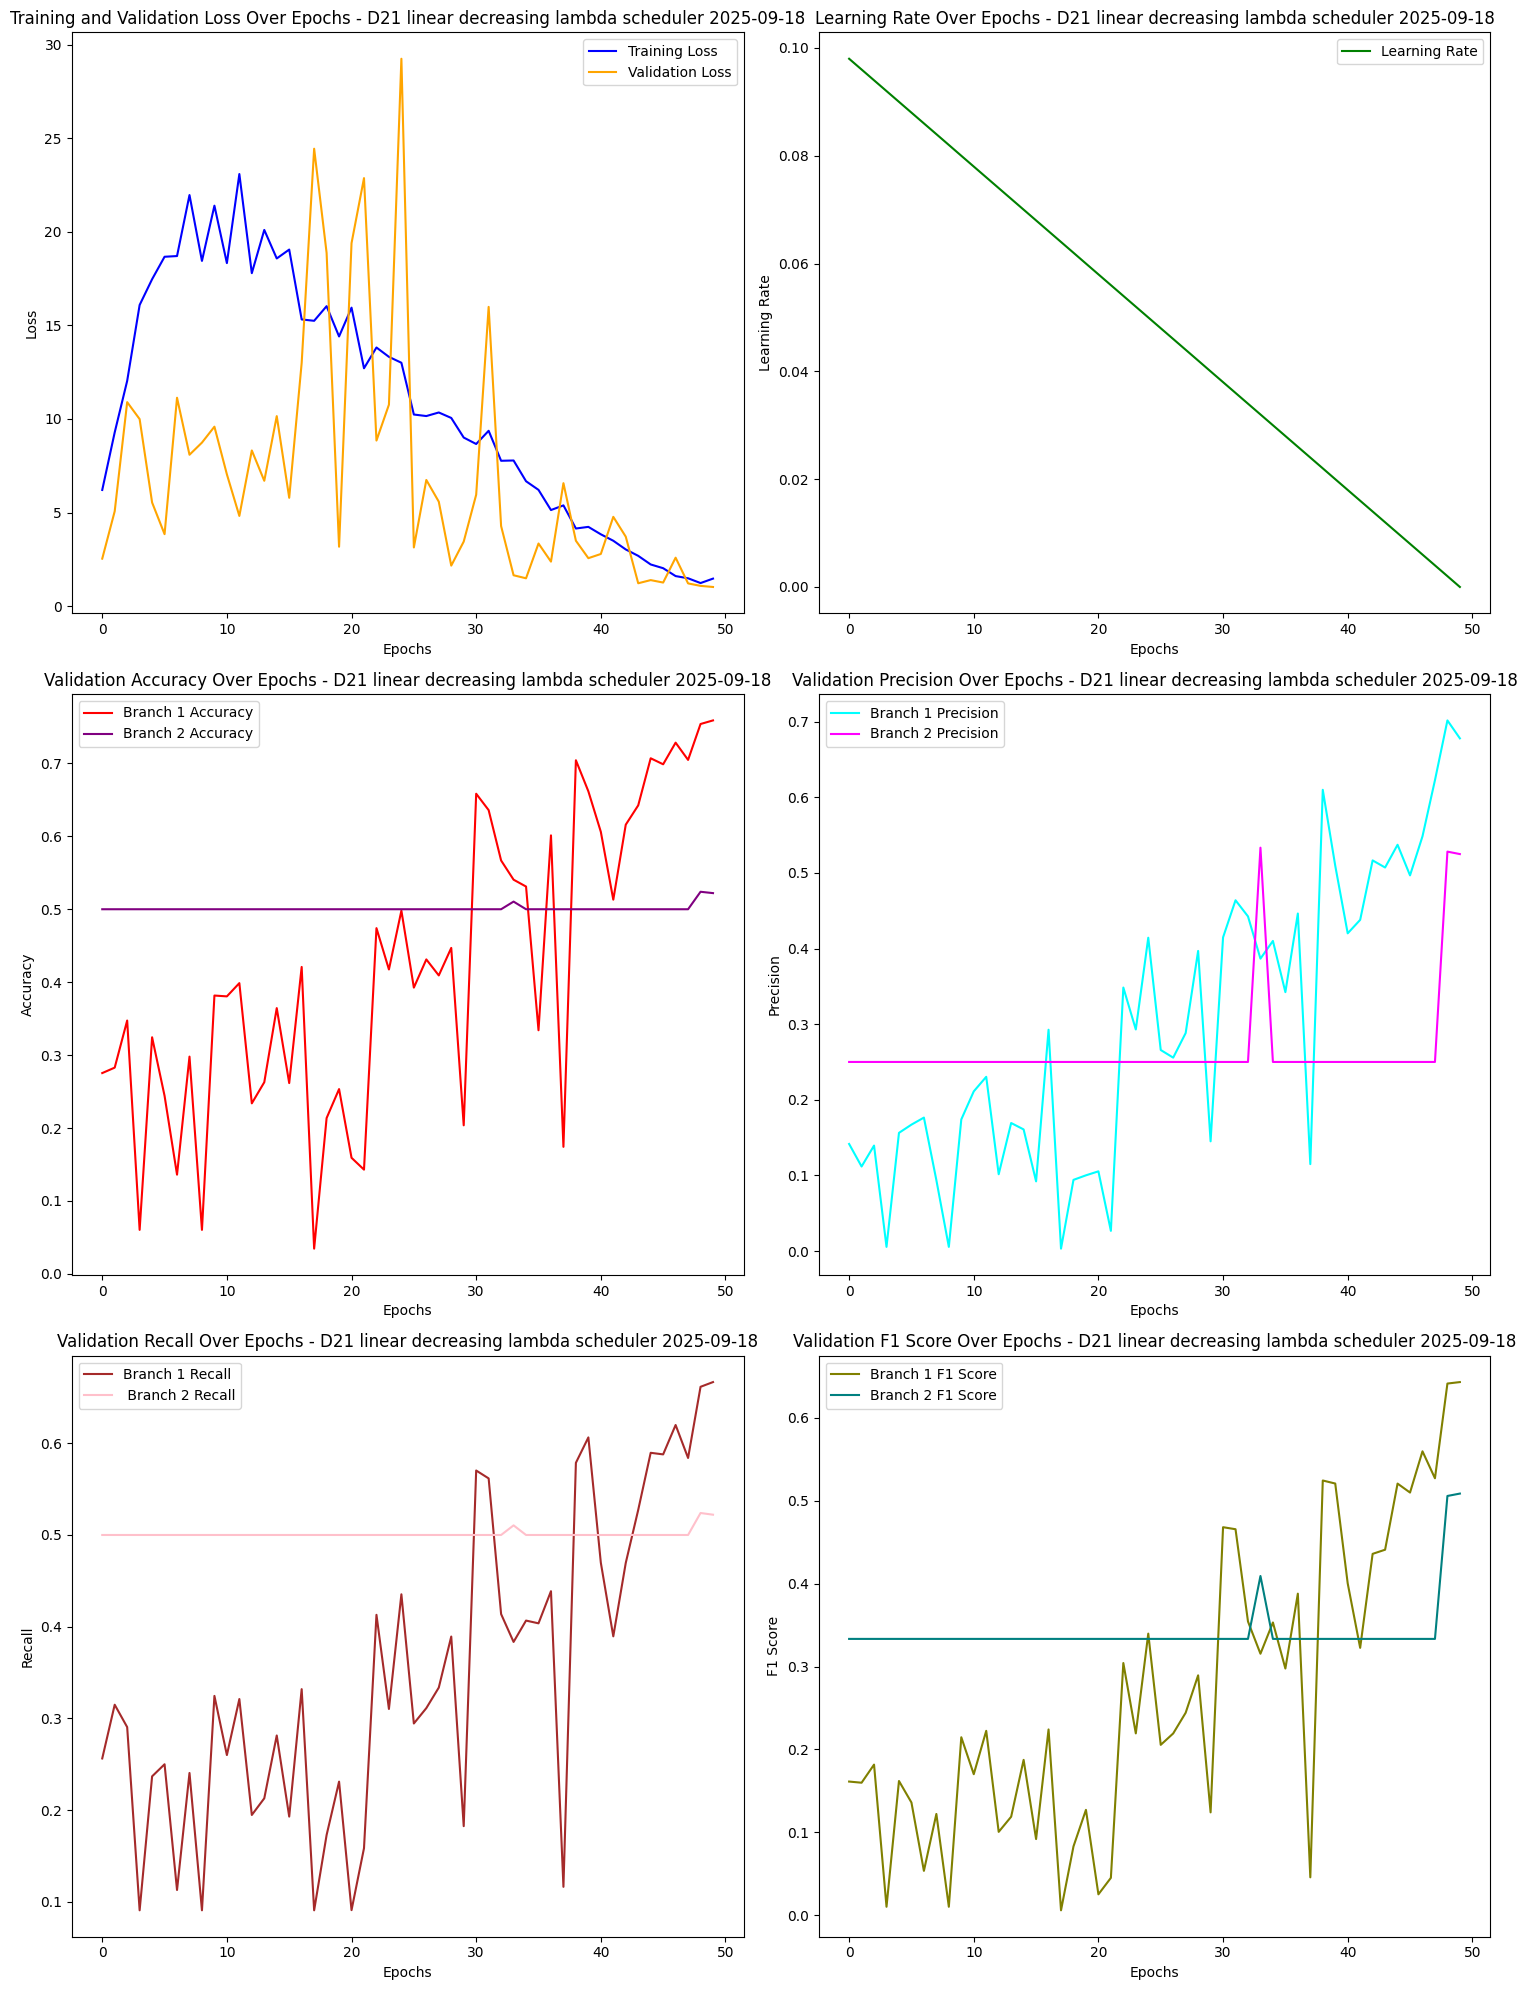

<Figure size 640x480 with 0 Axes>

In [15]:
# Linear decreasing
extract_and_save_metrics("./data/D21_results/linear_decreasing_lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_linear_decreasing_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/linear_decreasing_lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

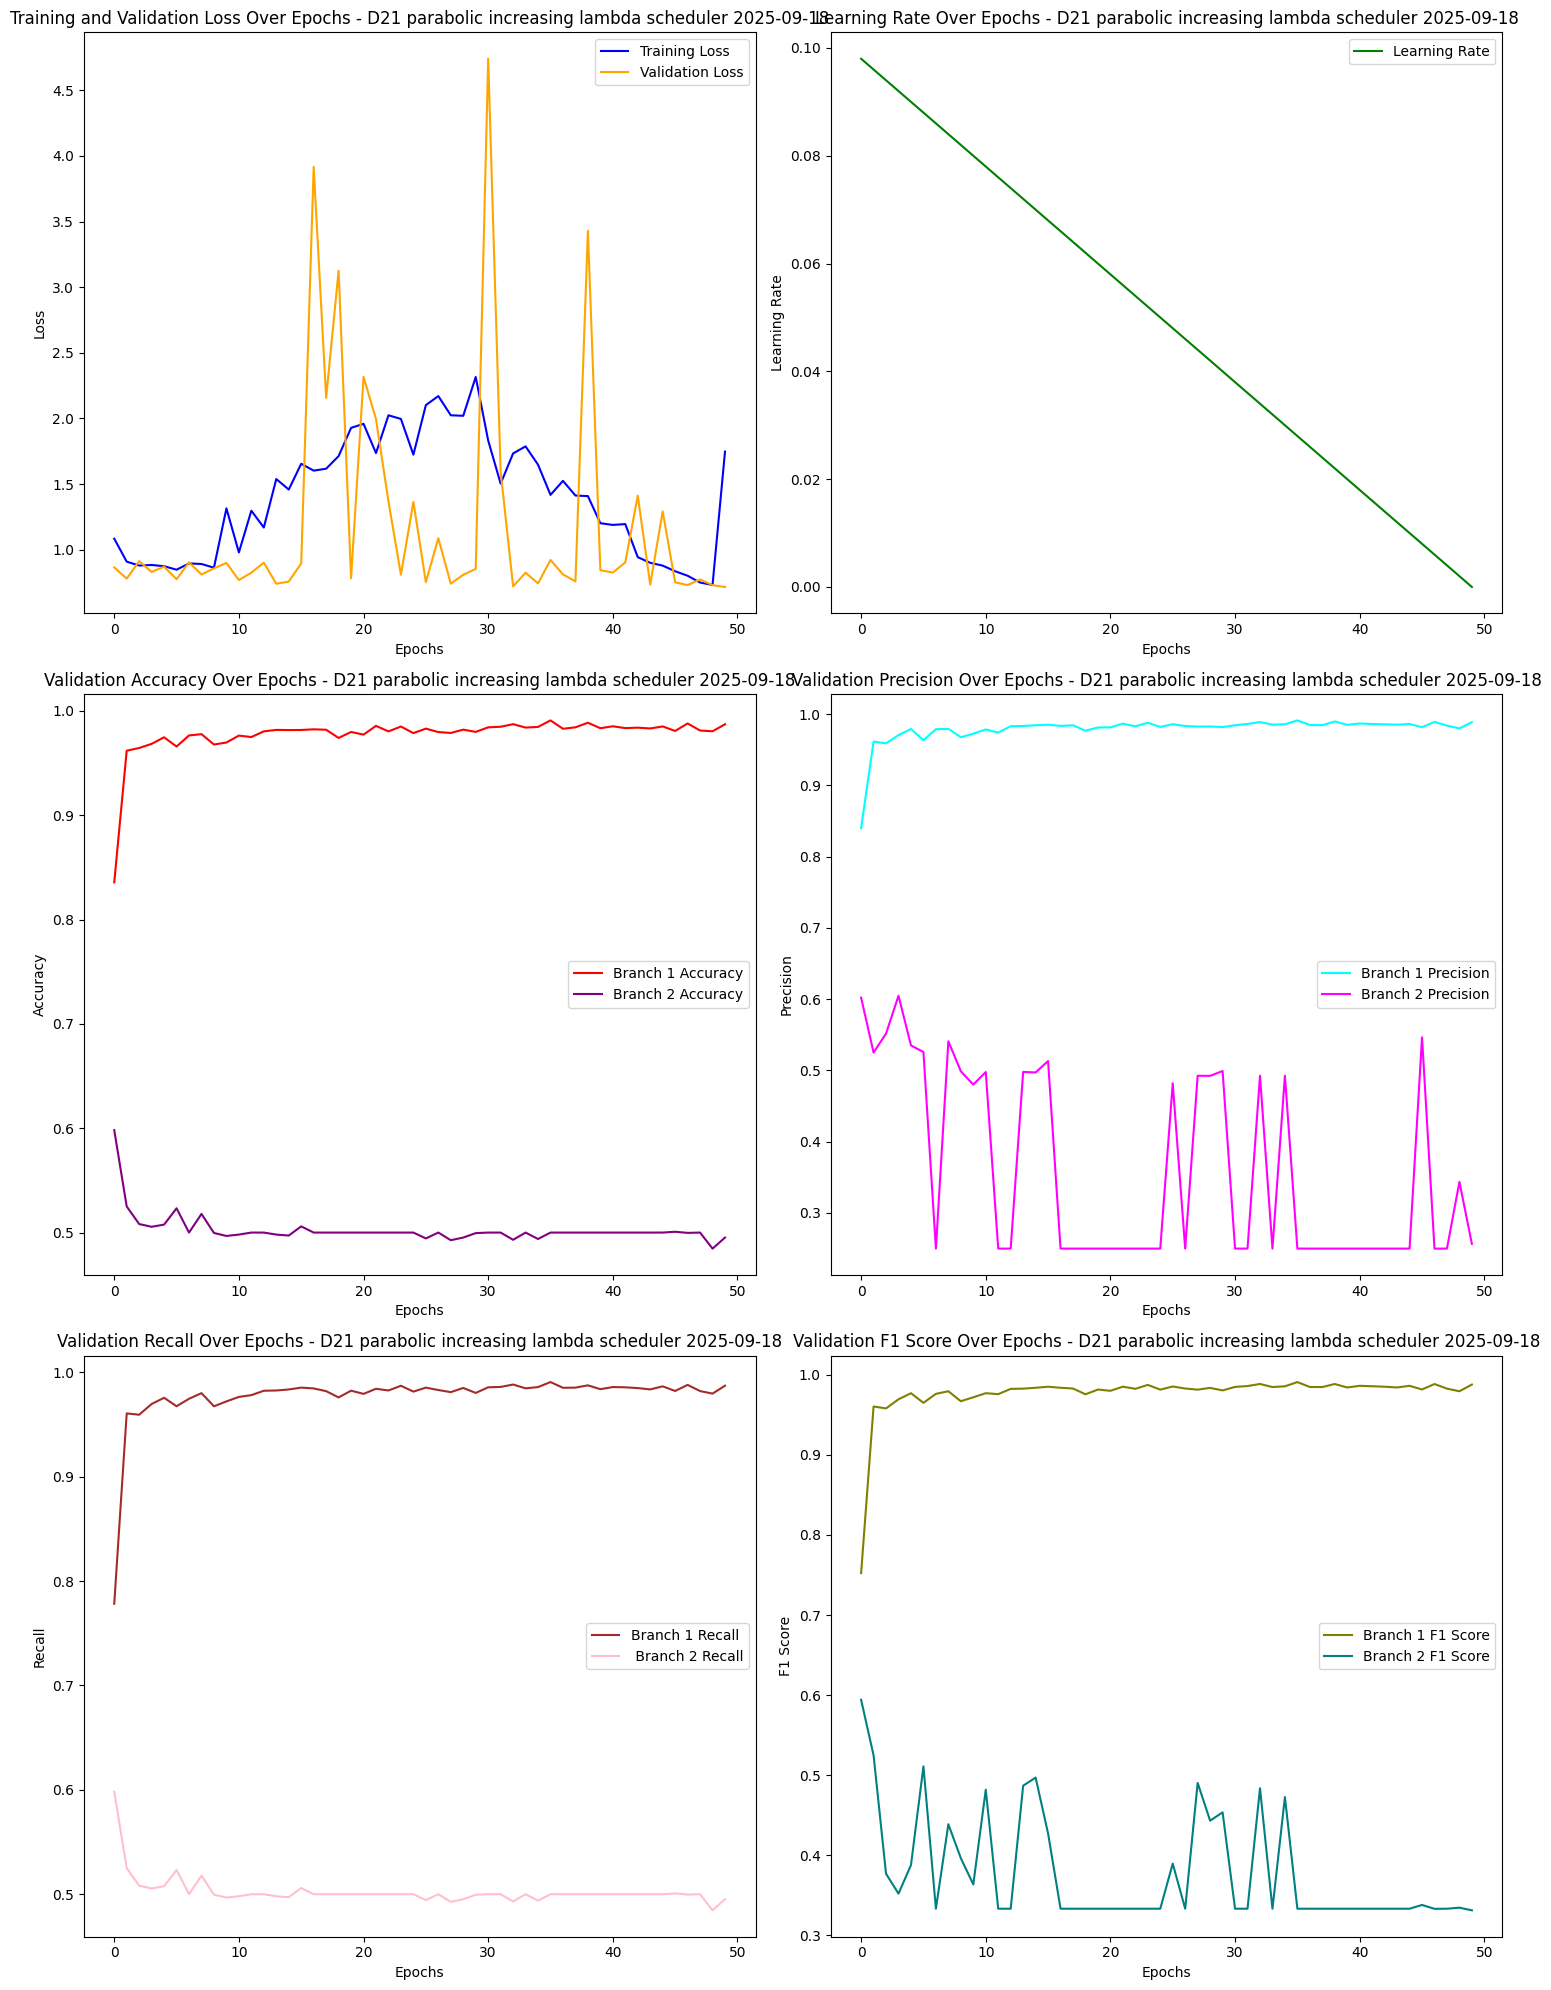

<Figure size 640x480 with 0 Axes>

In [16]:
# Parabolic increasing
extract_and_save_metrics("./data/D21_results/parabolic_increasing_lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_parabolic_increasing_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/parabolic_increasing_lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

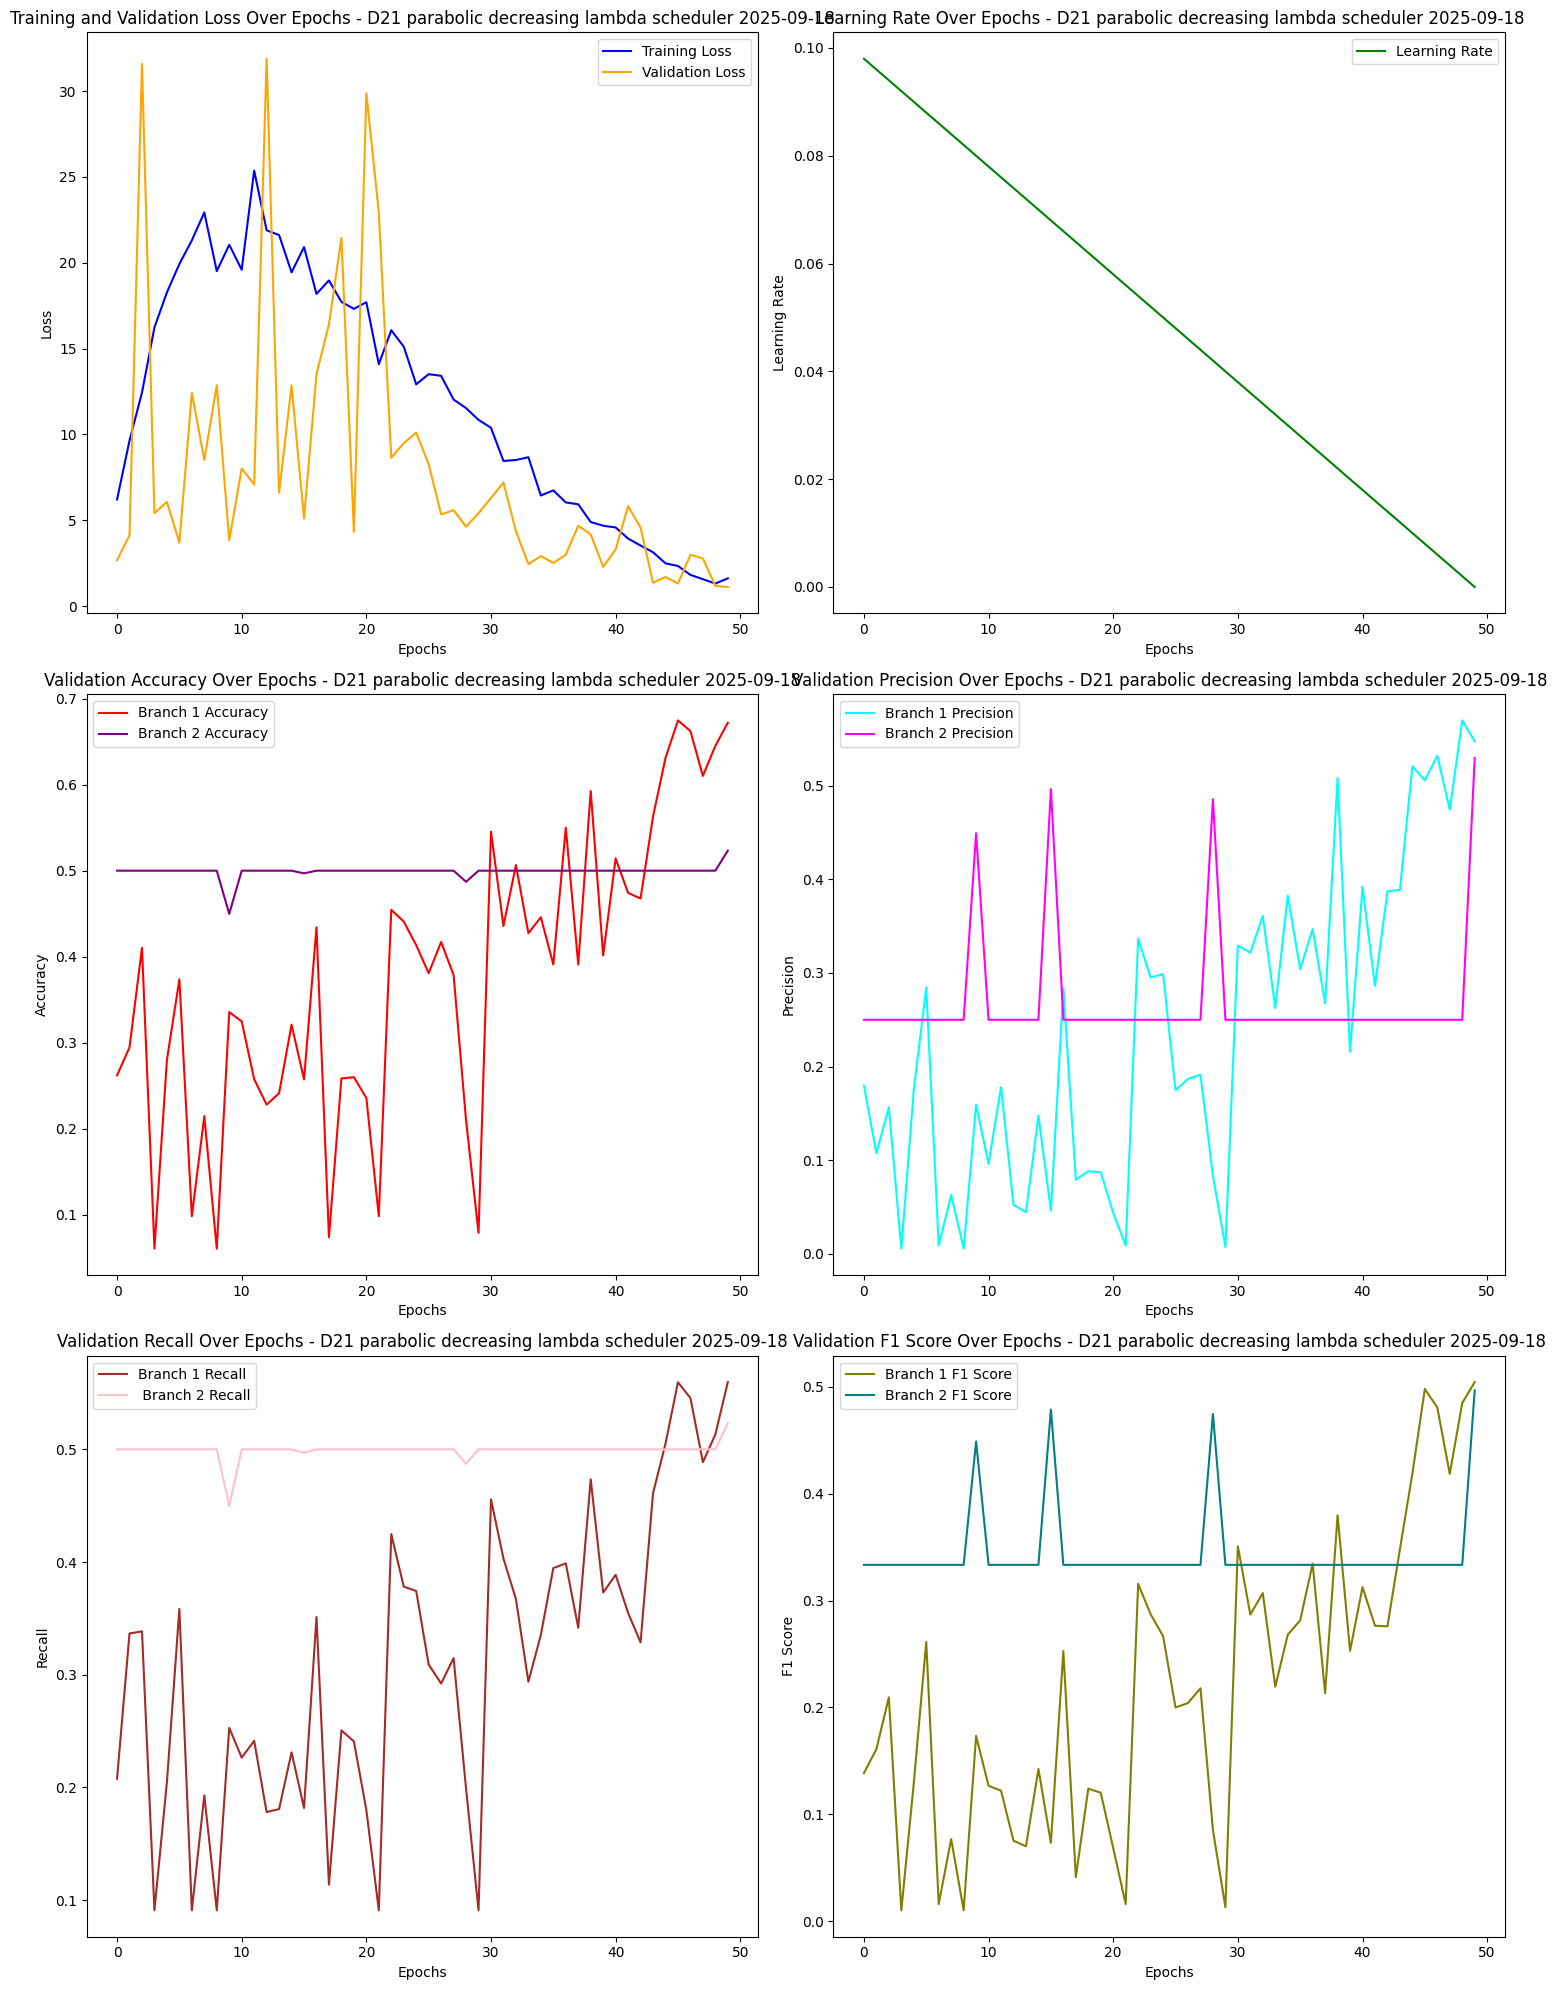

<Figure size 640x480 with 0 Axes>

In [17]:
# Parabolic decreasing
extract_and_save_metrics("./data/D21_results/parabolic_decreasing_lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_parabolic_decreasing_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/parabolic_decreasing_lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")

Processing checkpoint-2161
Processing checkpoint-4322
Processing checkpoint-6483
Processing checkpoint-8644
Processing checkpoint-10805
Processing checkpoint-12966
Processing checkpoint-15127
Processing checkpoint-17288
Processing checkpoint-19449
Processing checkpoint-21610
Processing checkpoint-23771
Processing checkpoint-25932
Processing checkpoint-28093
Processing checkpoint-30254
Processing checkpoint-32415
Processing checkpoint-34576
Processing checkpoint-36737
Processing checkpoint-38898
Processing checkpoint-41059
Processing checkpoint-43220
Processing checkpoint-45381
Processing checkpoint-47542
Processing checkpoint-49703
Processing checkpoint-51864
Processing checkpoint-54025
Processing checkpoint-56186
Processing checkpoint-58347
Processing checkpoint-60508
Processing checkpoint-62669
Processing checkpoint-64830
Processing checkpoint-66991
Processing checkpoint-69152
Processing checkpoint-71313
Processing checkpoint-73474
Processing checkpoint-75635
Processing checkpoint-77

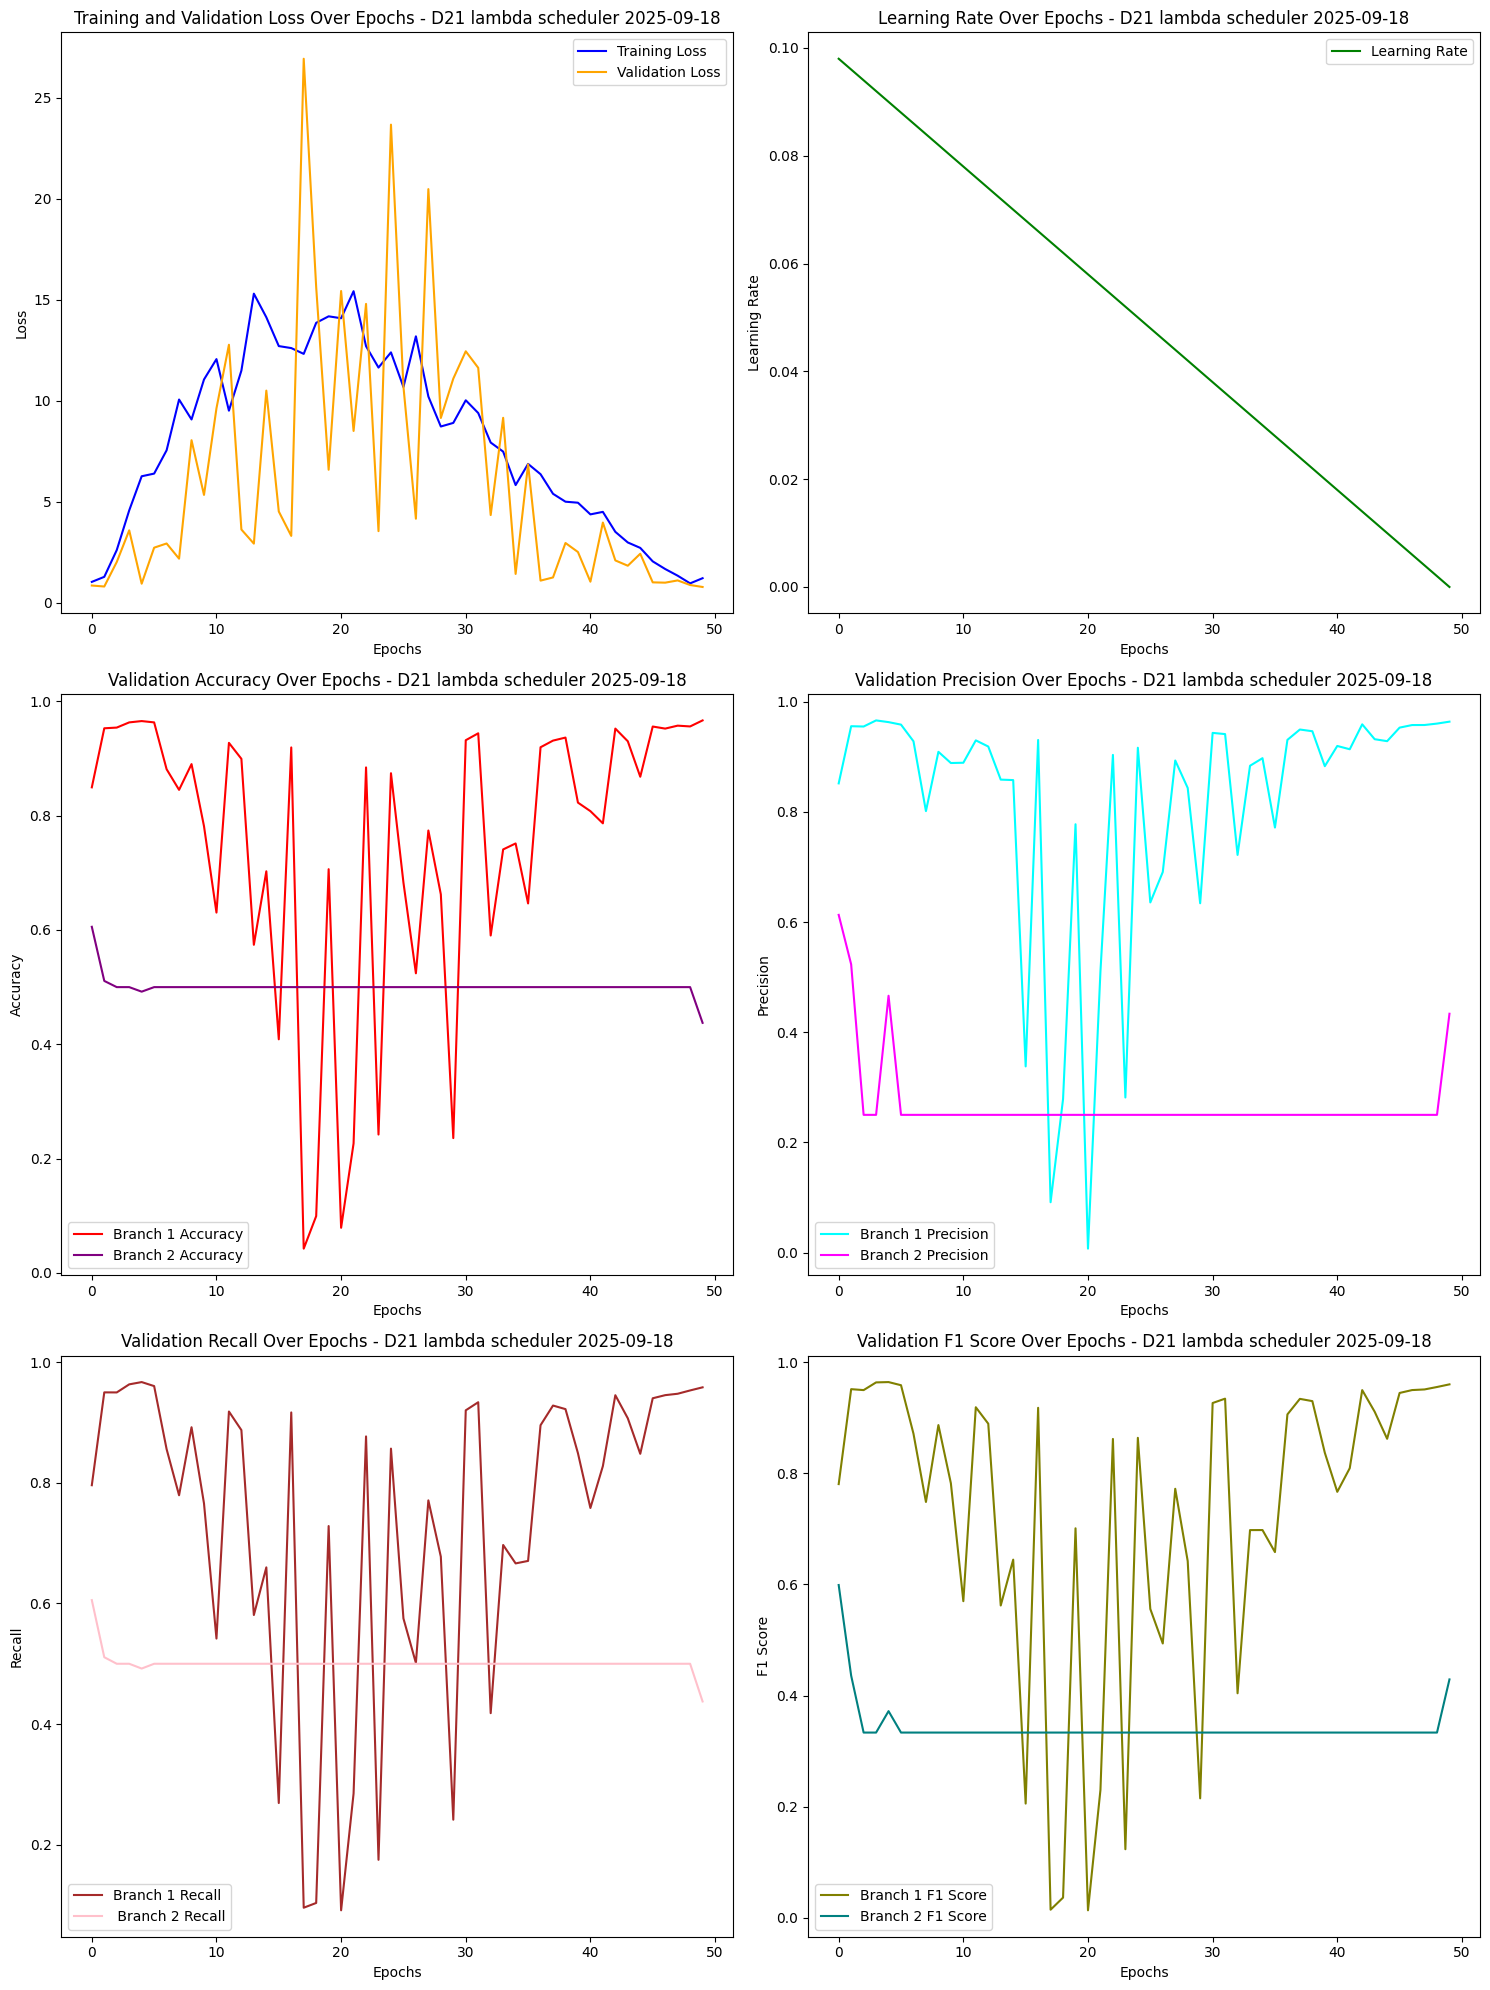

<Figure size 640x480 with 0 Axes>

In [18]:
# Ganin Lambda Scheduler
extract_and_save_metrics("./data/D21_results/lambda_scheduler_results_2025-09-18_11-41-54/checkpoint-108050", "./metric_csvs/hyper-tuning/D21_ganin_lambda_scheduler_metrics.csv")
get_plots("./data/D21_results/lambda_scheduler_results_2025-09-18_11-41-54", save_plots=True, experiment_name="D21")